# Plot rise vs decline for SN-likes

Author: Melissa Graham

Identify potential transients (supernovae).

Plot the rise vs. the decline.

## Set up and read in data

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

Colors to use for COSMOS-g, -r, -i and ELAIS-g, -r, -i

In [2]:
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']

all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

### Load the candidate lightcurves

In [3]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

### Load the lightcurve parameters data

In [4]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

## Identify potential transients

Non variable. Time spans of 30 to 120 days, to cover SNIa and SNII.

In [5]:
tx = np.where((paramLC_tspan_g > 30) & (paramLC_tspan_g < 120) & 
              (paramLC_tspan_r > 30) & (paramLC_tspan_r < 120) & 
              (paramLC_tspan_i > 30) & (paramLC_tspan_i < 120))[0]

gx = np.where((paramLC_tspan_g > 30) & (paramLC_tspan_g < 120))[0]
rx = np.where((paramLC_tspan_r > 30) & (paramLC_tspan_r < 120))[0]
ix = np.where((paramLC_tspan_i > 30) & (paramLC_tspan_i < 120))[0]

print(len(tx), len(gx), len(rx), len(ix))

56 187 246 267


## Calculate rise and decline times and rates

Calculate time between peak brightness and the first (rise time) and last (decline time) detection.

Calculate the rise and decline magnitudes in the 10 days before and 15 days after peak brightness, when possible.

* `rt` = rise time
* `rdm` = rise delta-mag
* `dt` = decline time
* `dm15` = decline delta-mag over 15 days post-max
* `dm50` = decline delta-mag over 50 days post-max

Just use r-band.

In [6]:
paramLC_rt_r = np.zeros(len(paramLC_field), dtype='float')
paramLC_dt_r = np.zeros(len(paramLC_field), dtype='float')
paramLC_rdm_r = np.zeros(len(paramLC_field), dtype='float')
paramLC_dm15_r = np.zeros(len(paramLC_field), dtype='float')
paramLC_dm50_r = np.zeros(len(paramLC_field), dtype='float')

for x in rx:
    px = np.where((candLC_candid == paramLC_candid[x])
                  & (candLC_filter == 'r') & (candLC_lef == 0))[0]
    days = candLC_mjd[px]
    mags = candLC_mag[px]
    del px
    
    mx = np.argmin(mags)
    paramLC_rt_r[x] = days[mx] - days[0]
    paramLC_dt_r[x] = days[-1] - days[mx]
    paramLC_rdm_r[x] = mags[mx] - mags[0]
    
    if paramLC_dt_r[x] >= 10:
        p15 = days[mx] + 15
        d15x = np.argmin(np.abs(days - p15))
        paramLC_dm15_r[x] = mags[mx] - mags[d15x]
        del p15, d15x
            
    if paramLC_dt_r[x] >= 45:
        p50 = days[mx] + 50
        d50x = np.argmin(np.abs(days - p50))
        paramLC_dm50_r[x] = mags[mx] - mags[d50x]
        del p50, d50x
    
    del mx, days, mags

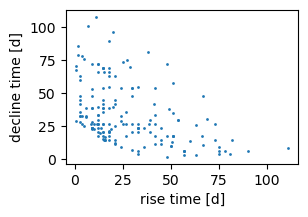

In [7]:
fig = plt.figure(figsize=(3, 2))
tx = np.where((paramLC_rt_r[rx] > 0) & (paramLC_dt_r[rx] > 0))[0]
plt.plot(paramLC_rt_r[rx[tx]], paramLC_dt_r[rx[tx]], 'o', ms=2, mew=0)
plt.xlabel('rise time [d]')
plt.ylabel('decline time [d]')
plt.show()

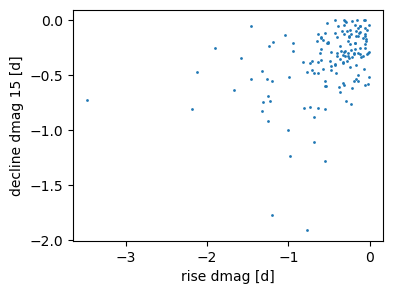

In [8]:
fig = plt.figure(figsize=(4, 3))
tx = np.where((paramLC_rt_r[rx] > 0) & (paramLC_dt_r[rx] >= 10))[0]
plt.plot(paramLC_rdm_r[rx[tx]], paramLC_dm15_r[rx[tx]], 'o', ms=2, mew=0)
plt.xlabel('rise dmag [d]')
plt.ylabel('decline dmag 15 [d]')
plt.show()

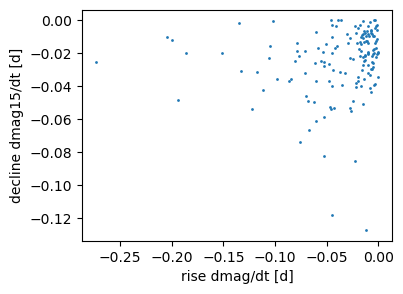

In [9]:
fig = plt.figure(figsize=(4, 3))
tx = np.where((paramLC_rt_r[rx] > 0) & (paramLC_dt_r[rx] >= 10))[0]
plt.plot(paramLC_rdm_r[rx[tx]]/paramLC_rt_r[rx[tx]], paramLC_dm15_r[rx[tx]]/15.0, 'o', ms=2, mew=0)
plt.xlabel('rise dmag/dt [d]')
plt.ylabel('decline dmag15/dt [d]')
plt.show()

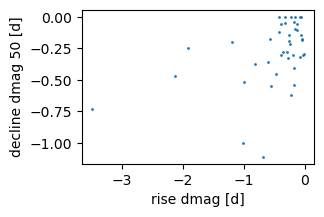

In [10]:
fig = plt.figure(figsize=(3, 2))
tx = np.where((paramLC_rt_r[rx] > 0) & (paramLC_dt_r[rx] >= 45))[0]
plt.plot(paramLC_rdm_r[rx[tx]], paramLC_dm15_r[rx[tx]], 'o', ms=2, mew=0)
plt.xlabel('rise dmag [d]')
plt.ylabel('decline dmag 50 [d]')
plt.show()

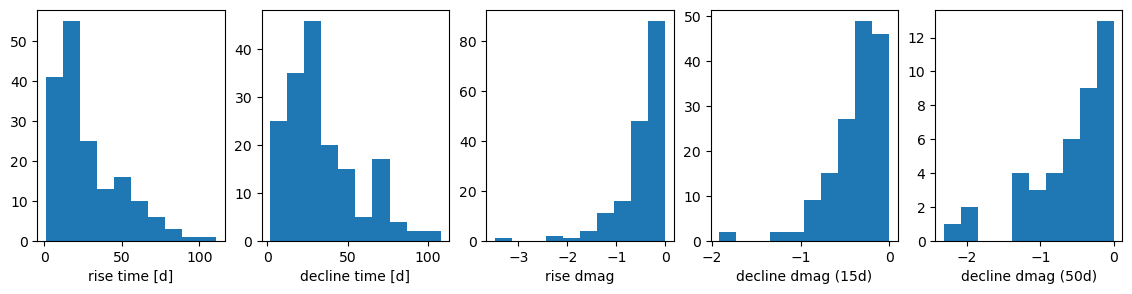

In [11]:
fig, ax = plt.subplots( 1, 5, figsize=(14, 3), sharex=False, sharey=False )

tx = np.where((paramLC_rt_r[rx] > 0) & (paramLC_dt_r[rx] > 0))[0]
ax[0].hist(paramLC_rt_r[rx[tx]])
ax[0].set_xlabel('rise time [d]')
ax[1].hist(paramLC_dt_r[rx[tx]])
ax[1].set_xlabel('decline time [d]')
ax[2].hist(paramLC_rdm_r[rx[tx]])
ax[2].set_xlabel('rise dmag')

tx = np.where((paramLC_rt_r[rx] > 0) & (paramLC_dt_r[rx] >= 10))[0]
ax[3].hist(paramLC_dm15_r[rx[tx]])
ax[3].set_xlabel('decline dmag (15d)')

tx = np.where((paramLC_rt_r[rx] > 0) & (paramLC_dt_r[rx] >= 45))[0]
ax[4].hist(paramLC_dm50_r[rx[tx]])
ax[4].set_xlabel('decline dmag (50d)')

plt.show()